In [ ]:
import pandas as pd
import numpy as np
import sklearn.datasets
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
import matplotlib.pyplot as plt

In [ ]:
dataset = sklearn.datasets.load_breast_cancer()

In [ ]:
data = pd.DataFrame(dataset.data, columns = dataset.feature_names)

In [ ]:
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
dataset.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [ ]:
data["target"] = dataset.target

In [ ]:
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [ ]:
data.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [ ]:
data["target"].value_counts()

1    357
0    212
Name: target, dtype: int64

0 = malignant
1 = benign


In [ ]:
train, test = train_test_split(data, test_size = 0.2, random_state = 1)

In [ ]:
X_train = train.drop(columns= "target", axis = 1)
X_test = test.drop(columns= "target", axis = 1)
Y_train = train["target"]
Y_test = test["target"]

XGBOOST model

In [ ]:
model = xgb.XGBClassifier()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import scipy.stats as stats

In [ ]:
parameters = {
    'max_depth' : stats.randint(10,20),
    'learning_rate' : stats.uniform(0.01,0.001),
    'n_estimators' : stats.randint(100,200)
}

In [ ]:
random_search = RandomizedSearchCV(model, param_distributions = parameters, n_iter = 100, cv = 5, scoring = 'accuracy', verbose = 3)

In [ ]:
random_search.fit(X_train, Y_train)

random_search.best_params_
random_search.best_score_

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END learning_rate=0.010251705631559284, max_depth=19, n_estimators=151;, score=0.912 total time=   1.5s
[CV 2/5] END learning_rate=0.010251705631559284, max_depth=19, n_estimators=151;, score=0.945 total time=   0.8s
[CV 3/5] END learning_rate=0.010251705631559284, max_depth=19, n_estimators=151;, score=0.978 total time=   0.3s
[CV 4/5] END learning_rate=0.010251705631559284, max_depth=19, n_estimators=151;, score=0.956 total time=   0.3s
[CV 5/5] END learning_rate=0.010251705631559284, max_depth=19, n_estimators=151;, score=0.956 total time=   0.3s
[CV 1/5] END learning_rate=0.010534443119057475, max_depth=14, n_estimators=142;, score=0.912 total time=   0.3s
[CV 2/5] END learning_rate=0.010534443119057475, max_depth=14, n_estimators=142;, score=0.945 total time=   0.3s
[CV 3/5] END learning_rate=0.010534443119057475, max_depth=14, n_estimators=142;, score=0.989 total time=   0.3s
[CV 4/5] END learning_rate=0.0105

0.9538461538461538

In [ ]:
random_search.best_params_

{'learning_rate': 0.010565603719935635, 'max_depth': 18, 'n_estimators': 120}

In [ ]:
random_search.best_score_

0.9516483516483516

In [ ]:
best_model = xgb.XGBClassifier(learning_rate = 0.010565603719935635, max_depth = 18, n_estimators = 120, booster = 'gbtree')

In [ ]:
best_model.fit(X_train, Y_train, eval_set = [(X_train, Y_train), (X_test,Y_test)], verbose = 50)

[0]	validation_0-logloss:0.65141	validation_1-logloss:0.65016
[50]	validation_0-logloss:0.34962	validation_1-logloss:0.39772
[100]	validation_0-logloss:0.20900	validation_1-logloss:0.28710
[119]	validation_0-logloss:0.17465	validation_1-logloss:0.26064


XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.010565603719935635,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=18, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=120, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
predictions = best_model.predict(X_test)

In [ ]:
predictions

array([1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1])

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(Y_test, predictions)

0.9473684210526315

NN classifier

In [ ]:
x_train = train.drop(columns= "target", axis = 1)
x_test = test.drop(columns= "target", axis = 1)
y_train = train["target"]
y_test = test["target"]

In [ ]:
scale = StandardScaler()

x_train_std = scale.fit_transform(x_train)
x_test_std = scale.fit_transform(x_test)

In [ ]:
from keras import layers

In [ ]:
model = keras.Sequential([
    layers.Flatten(input_shape = (30,)),
    layers.Dense(60,activation = 'relu'),
    layers.Dense(30,activation = 'relu'),
    layers.Dense(2,activation = 'sigmoid'),
    layers.Softmax()
])

In [ ]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-4),
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics='accuracy')

In [ ]:
history = model.fit(x_train_std, y_train, validation_data = (x_test_std, y_test), epochs=100)

Epoch 1/100
15/15 [==============================] - 1s 24ms/step - loss: 0.7393 - accuracy: 0.4176 - val_loss: 0.7310 - val_accuracy: 0.4825
Epoch 2/100
15/15 [==============================] - 0s 6ms/step - loss: 0.7218 - accuracy: 0.5121 - val_loss: 0.7159 - val_accuracy: 0.5877
Epoch 3/100
15/15 [==============================] - 0s 7ms/step - loss: 0.7045 - accuracy: 0.6088 - val_loss: 0.7004 - val_accuracy: 0.6316
Epoch 4/100
15/15 [==============================] - 0s 7ms/step - loss: 0.6869 - accuracy: 0.6835 - val_loss: 0.6846 - val_accuracy: 0.6842
Epoch 5/100
15/15 [==============================] - 0s 7ms/step - loss: 0.6695 - accuracy: 0.7407 - val_loss: 0.6680 - val_accuracy: 0.7281
Epoch 6/100
15/15 [==============================] - 0s 7ms/step - loss: 0.6522 - accuracy: 0.7692 - val_loss: 0.6521 - val_accuracy: 0.7719
Epoch 7/100
15/15 [==============================] - 0s 7ms/step - loss: 0.6354 - accuracy: 0.8176 - val_loss: 0.6359 - val_accuracy: 0.8070
Epoch 8/100


Text(0.5, 0, 'epoch')

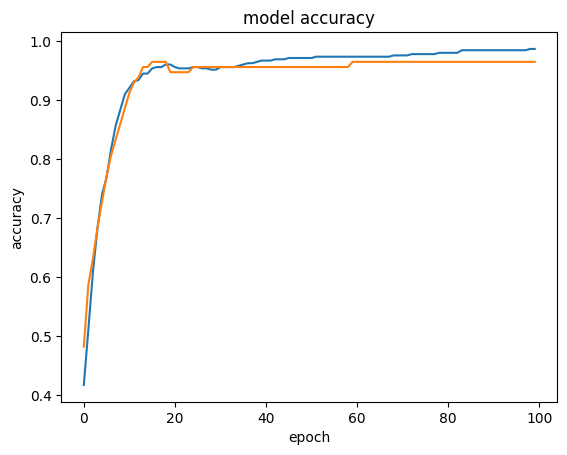

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

In [ ]:
preds = model.predict(x_test_std)

4/4 [==============================] - 0s 3ms/step


In [ ]:
preds

array([[0.6049599 , 0.39504012],
       [0.72387093, 0.27612904],
       [0.27450994, 0.72549003],
       [0.72874695, 0.27125308],
       [0.6851455 , 0.31485453],
       [0.72656375, 0.27343625],
       [0.730881  , 0.26911905],
       [0.7086852 , 0.2913147 ],
       [0.2696583 , 0.7303416 ],
       [0.28689036, 0.71310955],
       [0.26937371, 0.73062617],
       [0.72666544, 0.27333453],
       [0.72639817, 0.27360177],
       [0.26949057, 0.7305095 ],
       [0.477868  , 0.5221319 ],
       [0.34324414, 0.6567559 ],
       [0.26936182, 0.730638  ],
       [0.27272075, 0.7272792 ],
       [0.26934132, 0.73065865],
       [0.7308456 , 0.2691544 ],
       [0.2709617 , 0.7290383 ],
       [0.2708306 , 0.72916937],
       [0.7307529 , 0.2692471 ],
       [0.27963138, 0.72036856],
       [0.7273356 , 0.2726645 ],
       [0.2748092 , 0.72519076],
       [0.30989772, 0.6901022 ],
       [0.7308257 , 0.26917425],
       [0.7310586 , 0.26894143],
       [0.7211132 , 0.2788867 ],
       [0.

In [ ]:
pred_labels = [np.argmax(i) for i in preds]

In [ ]:
pred_labels

[0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1]

In [ ]:
accuracy_score(y_test, pred_labels)

0.9649122807017544